In [1]:
!python --version

Python 3.8.3


In [2]:
import sys; print(sys.executable)

C:\Users\lkk\Documents\Developer\.venv\Scripts\python.exe


In [3]:
#test Mayavi
# Create the data.
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

# View it.
from mayavi import mlab
s = mlab.mesh(x, y, z)
mlab.show()

In [2]:
import sys
print(sys.path)

['C:\\Users\\lkk\\Documents\\Developer\\3DDepth\\Notebook', 'C:\\Users\\lkk\\AppData\\Local\\Programs\\Python\\Python38\\python38.zip', 'C:\\Users\\lkk\\AppData\\Local\\Programs\\Python\\Python38\\DLLs', 'C:\\Users\\lkk\\AppData\\Local\\Programs\\Python\\Python38\\lib', 'C:\\Users\\lkk\\AppData\\Local\\Programs\\Python\\Python38', 'C:\\Users\\lkk\\Documents\\Developer\\.venv', '', 'C:\\Users\\lkk\\Documents\\Developer\\.venv\\lib\\site-packages', 'C:\\Users\\lkk\\Documents\\Developer\\.venv\\lib\\site-packages\\win32', 'C:\\Users\\lkk\\Documents\\Developer\\.venv\\lib\\site-packages\\win32\\lib', 'C:\\Users\\lkk\\Documents\\Developer\\.venv\\lib\\site-packages\\Pythonwin', 'C:\\Users\\lkk\\Documents\\Developer\\.venv\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\lkk\\.ipython']


In [3]:
import os 
  
# get current directory 
path = os.getcwd() 
print("Current Directory", path) 
  
# prints parent directory 
parentpath=os.path.abspath(os.path.join(path, os.pardir))
print(parentpath) 

Current Directory C:\Users\lkk\Documents\Developer\3DDepth\Notebook
C:\Users\lkk\Documents\Developer\3DDepth


In [4]:
sys.path.append(parentpath)
print(sys.path)

['C:\\Users\\lkk\\Documents\\Developer\\3DDepth\\Notebook', 'C:\\Users\\lkk\\AppData\\Local\\Programs\\Python\\Python38\\python38.zip', 'C:\\Users\\lkk\\AppData\\Local\\Programs\\Python\\Python38\\DLLs', 'C:\\Users\\lkk\\AppData\\Local\\Programs\\Python\\Python38\\lib', 'C:\\Users\\lkk\\AppData\\Local\\Programs\\Python\\Python38', 'C:\\Users\\lkk\\Documents\\Developer\\.venv', '', 'C:\\Users\\lkk\\Documents\\Developer\\.venv\\lib\\site-packages', 'C:\\Users\\lkk\\Documents\\Developer\\.venv\\lib\\site-packages\\win32', 'C:\\Users\\lkk\\Documents\\Developer\\.venv\\lib\\site-packages\\win32\\lib', 'C:\\Users\\lkk\\Documents\\Developer\\.venv\\lib\\site-packages\\Pythonwin', 'C:\\Users\\lkk\\Documents\\Developer\\.venv\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\lkk\\.ipython', 'C:\\Users\\lkk\\Documents\\Developer\\3DDepth']


In [5]:
import Kitti.viz_util as vizutils
import numpy as np
import os

In [6]:
Basepath=r'..\Waymo\sampledata' #r'D:\\Dataset\\WaymoKittitraining_0000\\'+'velodyne'

idx=30
lidar_filename = os.path.join(Basepath, "velodyne/%06d.bin" % (idx))
print(lidar_filename)

dtype=np.float32
n_vec=4
scan = np.fromfile(lidar_filename, dtype=dtype)
pc_velo = scan.reshape((-1, n_vec))
pc_velo.shape

..\Waymo\sampledata\velodyne/000030.bin


(168905, 4)

In [7]:
import mayavi.mlab as mlab
# import sys
fig = mlab.figure(
    figure=None, bgcolor=(0, 0, 0), fgcolor=None, engine=None, size=(1000, 500)
)
# if "mlab" not in sys.modules:
#     import mayavi.mlab as mlab
vizutils.draw_lidar(pc_velo, fig=fig, pc_label=False)
mlab.show()
# input_str = raw_input()
#mlab.clf()

==================== (168905, 4)


In [8]:
import Waymo.waymokitti_util as utils

[<Waymo.waymokitti_util.Object3d object at 0x000001D91DB39B80>, <Waymo.waymokitti_util.Object3d object at 0x000001D91DB39BB0>, <Waymo.waymokitti_util.Object3d object at 0x000001D91DB39C40>, <Waymo.waymokitti_util.Object3d object at 0x000001D91DB39C10>, <Waymo.waymokitti_util.Object3d object at 0x000001D91E526FD0>, <Waymo.waymokitti_util.Object3d object at 0x000001D91E526B80>, <Waymo.waymokitti_util.Object3d object at 0x000001D91E511790>, <Waymo.waymokitti_util.Object3d object at 0x000001D91E5116D0>, <Waymo.waymokitti_util.Object3d object at 0x000001D91E511520>, <Waymo.waymokitti_util.Object3d object at 0x000001D91E5119D0>, <Waymo.waymokitti_util.Object3d object at 0x000001D91E5117C0>, <Waymo.waymokitti_util.Object3d object at 0x000001D91DD9D5B0>, <Waymo.waymokitti_util.Object3d object at 0x000001D91DD9D610>, <Waymo.waymokitti_util.Object3d object at 0x000001D91DD9D580>, <Waymo.waymokitti_util.Object3d object at 0x000001D91E556040>, <Waymo.waymokitti_util.Object3d object at 0x000001D91E

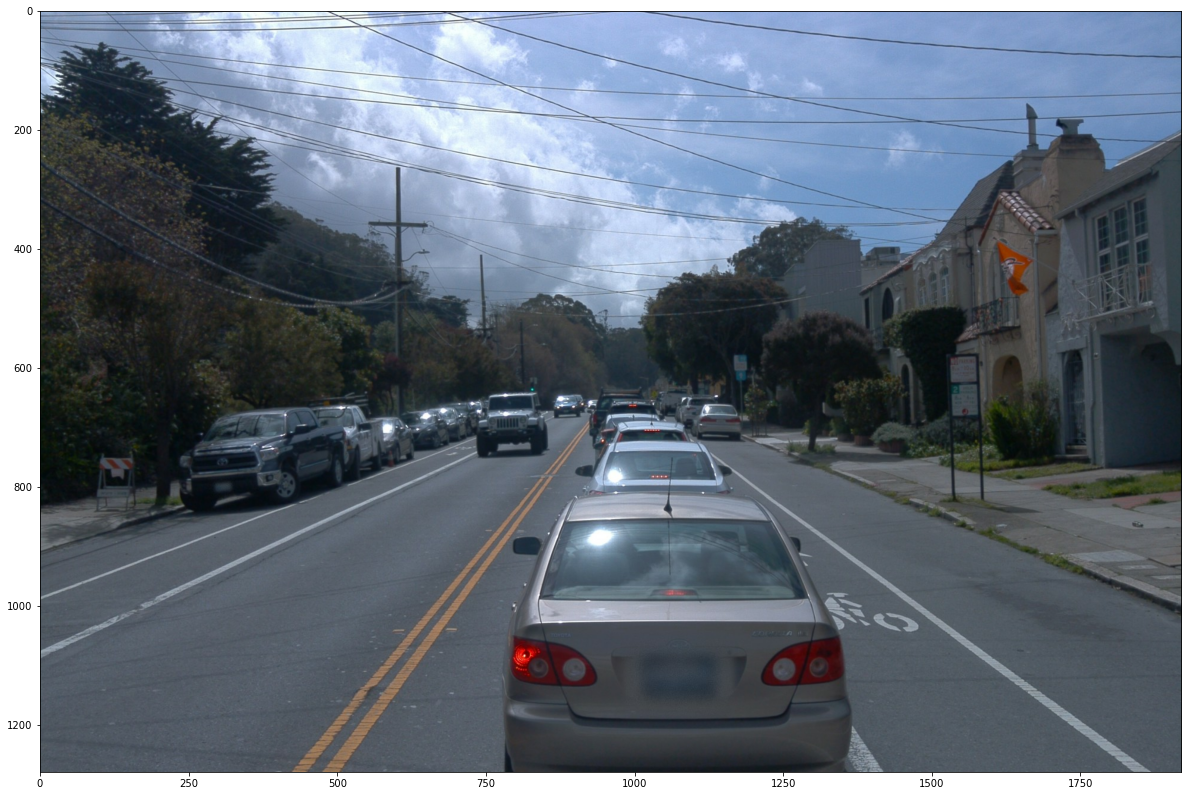

In [9]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 14)

Basepath=r'..\Waymo\sampledata'#r'D:\\Dataset\\WaymoKittitraining_0000\\'
data_idx=30
filename="%06d.png" % (data_idx)
image_file = os.path.join(Basepath, 'image_0', filename)
calibration_file = os.path.join(Basepath, 'calib', filename.replace('png', 'txt'))
label_file = os.path.join(Basepath, 'label_0', filename.replace('png', 'txt'))
lidar_filename = os.path.join(Basepath, 'velodyne', filename.replace('png', 'bin'))

object3dlabel=utils.read_label(label_file)
print(object3dlabel)

pc_veloall=utils.load_velo_scan(lidar_filename, np.float32, 4)
pc_velo = pc_veloall[:, 0:4]

img = cv2.imread(image_file)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_height, img_width, img_channel = rgb.shape
plt.imshow(rgb)

print(data_idx, "image shape: ", rgb.shape)
print(data_idx, "velo  shape: ", pc_velo.shape)

In [10]:
print(len(object3dlabel))
print(object3dlabel[0].type)
box=object3dlabel[0]
print(box)
data=[box.t[0], box.t[1], box.t[2], box.l, box.w, box.h, box.ry, box.type]#x, y,z
print(data)

35
Car
[-4.16, 2.34, -60.17, 3.91, 1.79, 1.49, 1.49, 'Car']


In [11]:
box.box2d #'bbox_xmin', 'bbox_ymin', 'bbox_xmax', 'bbox_ymax'

array([0., 0., 0., 0.])

In [12]:
class WaymoCalibration(object):
    """ Calibration matrices and utils
        3d XYZ in <label>.txt are in rect camera coord. 
        2d box xy are in image2 coord
        Points in <lidar>.bin are in Velodyne coord.

        y_image2 = P^2_rect * x_rect
        y_image2 = P^2_rect * R0_rect * Tr_velo_to_cam * x_velo
        x_ref = Tr_velo_to_cam * x_velo
        x_rect = R0_rect * x_ref

        P^2_rect = [f^2_u,  0,      c^2_u,  -f^2_u b^2_x;
                    0,      f^2_v,  c^2_v,  -f^2_v b^2_y;
                    0,      0,      1,      0]
                 = K * [1|t]

        image2 coord:
         ----> x-axis (u)
        |
        |
        v y-axis (v)

        velodyne coord:
        front x, left y, up z

        rect/ref camera coord:
        right x, down y, front z

        Ref (KITTI paper): http://www.cvlibs.net/publications/Geiger2013IJRR.pdf

        TODO(rqi): do matrix multiplication only once for each projection.
    """

    def __init__(self, calib_filepath):
        self.camera_count = 5
        calibs = self.read_calib_file(calib_filepath)
        print(calibs)
        # Projection matrix from rect camera coord to image2 coord
        #self.P = calibs["P0"]#["P2"]
        #self.P = np.reshape(self.P, [3, 4])
        P_name = ["P"+str(i) for i in range(self.camera_count)] 
        self.P = [np.reshape(calibs[name], [3,4]) for name in P_name] #5 cameras
        
        
        # Rigid transform from Velodyne coord to reference camera coord
        #self.V2C = calibs["Tr_velo_to_cam_0"]#calibs["Tr_velo_to_cam"]
        #self.V2C = np.reshape(self.V2C, [3, 4])
        
        Tr_velo_to_cam_name = ["Tr_velo_to_cam_"+str(i) for i in range(self.camera_count)] 
        self.V2C = [np.reshape(calibs[name],[3,4]) for name in Tr_velo_to_cam_name] #array for 5 cameras
        
        #self.C2V = self.inverse_rigid_trans(self.V2C)
        self.C2V = [self.inverse_rigid_trans(self.V2C[i]) for i in range(self.camera_count)]
        # Rotation from reference camera coord to rect camera coord
        self.R0 = calibs["R0_rect"], #'R0_rect': array([1., 0., 0., 0., 1., 0., 0., 0., 1.]), not used in Waymo
        self.R0 = np.reshape(self.R0, [3, 3])

        # Camera intrinsics and extrinsics
#         self.c_u = self.P[0, 2]
#         self.c_v = self.P[1, 2]
#         self.f_u = self.P[0, 0]
#         self.f_v = self.P[1, 1]
#         self.b_x = self.P[0, 3] / (-self.f_u)  # relative
#         self.b_y = self.P[1, 3] / (-self.f_v)

    def inverse_rigid_trans(self,Tr):
        """ Inverse a rigid body transform matrix (3x4 as [R|t])
            [R'|-R't; 0|1]
        """
        inv_Tr = np.zeros_like(Tr)  # 3x4
        inv_Tr[0:3, 0:3] = np.transpose(Tr[0:3, 0:3])
        inv_Tr[0:3, 3] = np.dot(-np.transpose(Tr[0:3, 0:3]), Tr[0:3, 3])
        return inv_Tr

    def read_calib_file(self, filepath):
        """ Read in a calibration file and parse into a dictionary.
        Ref: https://github.com/utiasSTARS/pykitti/blob/master/pykitti/utils.py
        """
        data = {}
        with open(filepath, "r") as f:
            for line in f.readlines():
                line = line.rstrip()
                if len(line) == 0:
                    continue
                key, value = line.split(":", 1)
                # The only non-float values in these files are dates, which
                # we don't care about anyway
                try:
                    data[key] = np.array([float(x) for x in value.split()])
                except ValueError:
                    pass

        return data
    
    # convert 3Dbox in rect camera coordinate to velodyne coordinate
    def project_rect_to_velo(self, pts_3d_rect, camera_id):
        """ Input: nx3 points in rect camera coord.
            Output: nx3 points in velodyne coord.
        """
        pts_3d_ref = self.project_rect_to_ref(pts_3d_rect)# using R0 to convert to camera rectified coordinate (same to camera coordinate)
        return self.project_ref_to_velo(pts_3d_ref, camera_id)#using C2V
    
    def project_rect_to_ref(self, pts_3d_rect):
        """ Input and Output are nx3 points """
        return np.transpose(np.dot(np.linalg.inv(self.R0), np.transpose(pts_3d_rect)))
    
    def project_ref_to_velo(self, pts_3d_ref, camera_id):
        pts_3d_ref = self.cart2hom(pts_3d_ref)  # nx4
        return np.dot(pts_3d_ref, np.transpose(self.C2V[camera_id]))
    
    def cart2hom(self, pts_3d):
        """ Input: nx3 points in Cartesian
            Oupput: nx4 points in Homogeneous by pending 1
        """
        n = pts_3d.shape[0]
        pts_3d_hom = np.hstack((pts_3d, np.ones((n, 1))))
        return pts_3d_hom
    
    def project_ref_to_rect(self, pts_3d_ref):
        """ Input and Output are nx3 points """
        return np.transpose(np.dot(self.R0, np.transpose(pts_3d_ref)))
    
    # ===========================
    # ------- 3d to 2d ----------
    # ===========================
    def project_cam3d_to_image(self, pts_3d_rect, cameraid):
        """ Input: nx3 points in rect camera coord.
            Output: nx2 points in image coord.
        """
        pts_3d_rect = self.cart2hom(pts_3d_rect)
        pts_2d = np.dot(pts_3d_rect, np.transpose(self.P[cameraid]))  # nx3
        pts_2d[:, 0] /= pts_2d[:, 2]
        pts_2d[:, 1] /= pts_2d[:, 2]
        return pts_2d[:, 0:2]
    
    #Liar project to image
    def project_velo_to_cameraid_rect(self, pts_3d_velo, cameraid):
        pts_3d_camid = self.project_velo_to_cameraid(pts_3d_velo, cameraid)
        return self.project_ref_to_rect(pts_3d_camid)#apply R0
    
    def project_velo_to_cameraid(self, pts_3d_velo, cameraid):#project velodyne to camid frame
        pts_3d_velo = self.cart2hom(pts_3d_velo)  # nx4
        return np.dot(pts_3d_velo, np.transpose(self.V2C[cameraid]))
    
    def project_velo_to_image(self, pts_3d_velo, cameraid):
        """ Input: nx3 points in velodyne coord.
            Output: nx2 points in image2 coord.
        """
        pts_3d_rect = self.project_velo_to_cameraid_rect(pts_3d_velo, cameraid)
        return self.project_cam3d_to_image(pts_3d_rect, cameraid)

In [13]:
calibration_file

'..\\Waymo\\sampledata\\calib\\000030.txt'

In [14]:
calib=WaymoCalibration(calibration_file)

{'P0': array([2.060143e+03, 0.000000e+00, 9.755965e+02, 0.000000e+00,
       0.000000e+00, 2.060143e+03, 6.308533e+02, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00]), 'P1': array([2.050448e+03, 0.000000e+00, 9.647180e+02, 0.000000e+00,
       0.000000e+00, 2.050448e+03, 6.472422e+02, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00]), 'P2': array([2.059360e+03, 0.000000e+00, 9.549019e+02, 0.000000e+00,
       0.000000e+00, 2.059360e+03, 6.497884e+02, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00]), 'P3': array([2.062890e+03, 0.000000e+00, 9.846079e+02, 0.000000e+00,
       0.000000e+00, 2.062890e+03, 2.429971e+02, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00]), 'P4': array([2.053258e+03, 0.000000e+00, 9.626310e+02, 0.000000e+00,
       0.000000e+00, 2.053258e+03, 2.408840e+02, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00]), 'R0_rect': arr

In [15]:
calib.P

[array([[2.060143e+03, 0.000000e+00, 9.755965e+02, 0.000000e+00],
        [0.000000e+00, 2.060143e+03, 6.308533e+02, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00]]),
 array([[2.050448e+03, 0.000000e+00, 9.647180e+02, 0.000000e+00],
        [0.000000e+00, 2.050448e+03, 6.472422e+02, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00]]),
 array([[2.059360e+03, 0.000000e+00, 9.549019e+02, 0.000000e+00],
        [0.000000e+00, 2.059360e+03, 6.497884e+02, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00]]),
 array([[2.062890e+03, 0.000000e+00, 9.846079e+02, 0.000000e+00],
        [0.000000e+00, 2.062890e+03, 2.429971e+02, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00]]),
 array([[2.053258e+03, 0.000000e+00, 9.626310e+02, 0.000000e+00],
        [0.000000e+00, 2.053258e+03, 2.408840e+02, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00]])]

In [16]:
""" Takes an object and a projection matrix (P) and projects the 3d
    bounding box into the image plane.
    Returns:
        corners_2d: (8,2) array in left image coord.
        corners_3d: (8,3) array in in rect camera coord.
"""
box=object3dlabel[0]
index=0
_, box3d_pts_3d = utils.compute_box_3d(box, calib.P[index])
box3d_pts_3d

array([[ -3.1101347 ,   2.34      , -62.04638824],
       [ -4.89429527,   2.34      , -62.19085637],
       [ -5.2098653 ,   2.34      , -58.29361176],
       [ -3.42570473,   2.34      , -58.14914363],
       [ -3.1101347 ,   0.85      , -62.04638824],
       [ -4.89429527,   0.85      , -62.19085637],
       [ -5.2098653 ,   0.85      , -58.29361176],
       [ -3.42570473,   0.85      , -58.14914363]])

In [17]:
camera_index=0
box3d_pts_3d_velo = calib.project_rect_to_velo(box3d_pts_3d, camera_index)
box3d_pts_3d_velo

array([[-60.48077565,   3.367698  ,  -0.51131738],
       [-60.61709719,   5.15249841,  -0.51324697],
       [-56.71849405,   5.45028954,  -0.49555998],
       [-56.58217251,   3.66548913,  -0.49363039],
       [-60.48761846,   3.36878621,   0.97866653],
       [-60.62394   ,   5.15358662,   0.97673694],
       [-56.72533686,   5.45137775,   0.99442393],
       [-56.58901532,   3.66657734,   0.99635352]])

In [18]:
INSTANCE3D_Color = {
    'Car':(0, 1, 0), 'Pedestrian':(0, 1, 1), 'Sign': (1, 1, 0), 'Cyclist':(0.5, 0.5, 0.3)
}#'Car', 'Van', 'Truck','Pedestrian', 'Person_sitting', 'Cyclist', 'Tram','Misc' or 'DontCare'


In [19]:
import Kitti.viz_util as vizutils

import mayavi.mlab as mlab
# import sys
fig = mlab.figure(
    figure=None, bgcolor=(0, 0, 0), fgcolor=None, engine=None, size=(1000, 500)
)
# if "mlab" not in sys.modules:
#     import mayavi.mlab as mlab
vizutils.draw_lidar(pc_velo, fig=fig, pc_label=False)

#only draw camera 0's 3D label
camera_index=0
ref_cameraid=0 #3D labels are annotated in camera 0 frame
#object3dlabel is read in the previous cell
#object3dlabel=objectlabels[camera_index]#camera 0
color = (0, 1, 0)
for obj in object3dlabel:
    if obj.type == "DontCare":
        continue
    print(obj.type)
    # Draw 3d bounding box
    _, box3d_pts_3d = utils.compute_box_3d(obj, calib.P[camera_index])
    box3d_pts_3d_velo = calib.project_rect_to_velo(box3d_pts_3d, ref_cameraid)
    print("box3d_pts_3d_velo:")
    print(box3d_pts_3d_velo)
    #draw_gt_boxes3d([box3d_pts_3d_velo], fig=fig, color=color)
    colorlabel=INSTANCE3D_Color[obj.type]
    vizutils.draw_gt_boxes3d([box3d_pts_3d_velo], fig=fig, color=colorlabel, label=obj.type)


mlab.show()

==================== (168905, 4)
Car
box3d_pts_3d_velo:
[[-60.48077565   3.367698    -0.51131738]
 [-60.61709719   5.15249841  -0.51324697]
 [-56.71849405   5.45028954  -0.49555998]
 [-56.58217251   3.66548913  -0.49363039]
 [-60.48761846   3.36878621   0.97866653]
 [-60.62394      5.15358662   0.97673694]
 [-56.72533686   5.45137775   0.99442393]
 [-56.58901532   3.66657734   0.99635352]]
Car
box3d_pts_3d_velo:
[[39.98271424  0.51725125  0.21214968]
 [40.04816865 -1.3716142   0.21382982]
 [35.79076919 -1.51916214  0.19438531]
 [35.72531479  0.3697033   0.19270518]
 [39.97435592  0.51858047  2.03213003]
 [40.03981032 -1.37028498  2.03381016]
 [35.78241086 -1.51783292  2.01436566]
 [35.71695646  0.37103253  2.01268552]]
Car
box3d_pts_3d_velo:
[[-40.13824259   6.80179496  -0.66040421]
 [-40.16778304   8.62155456  -0.66186894]
 [-36.02837223   8.68876556  -0.64290762]
 [-35.99883177   6.86900596  -0.64144289]
 [-40.14637129   6.80308767   1.10957667]
 [-40.17591175   8.62284727   1.108111